In [1]:
library(ggplot2)
library(tidyr)
library(ggbeeswarm)
library(RColorBrewer)
library(stringr)
library(extrafont)
loadfonts(device = "pdf")

Registering fonts with R



In [2]:
theme_set(theme_classic() + 
          theme(axis.title.x = element_text(hjust=-0.3, vjust = 16, size = 11)
                , axis.title.y = element_text(size = 11)
                , legend.position = "bottom"
                , strip.background = element_blank(), strip.placement = "outside"
                , strip.text.x = element_text(vjust = 2)
                , axis.ticks.y = element_line(color = "black") 
                , axis.ticks.x = element_blank(), panel.spacing.x = unit(0, "null")
                , plot.title = element_text(hjust = 0.5, size = 11)
                , axis.text.x = element_text(colour = "black", size = 11)
                , axis.text.y = element_text(colour = "black", size = 11)
                , text = element_text(family="ArialMT", size = 11)
                , plot.margin = margin(0.1, 0, -0.25, 0, "in")
                , plot.background = element_rect(fill='transparent', color=NA)
                , panel.background = element_rect(fill='transparent', color=NA)
                , rect = element_rect(fill = "transparent")))

In [24]:
summary_all <- read.delim('data/CRISPResso_summary.txt')
summary_all <- gather(summary_all[,1:3], key = "Edit_Type", value = "Percent", -Batch)
summary_all$rep <- gsub("_.*", "", summary_all$Batch)
summary_all$type <-  str_to_title(gsub("_.*", "", gsub("REP[1-3]_", "", summary_all$Batch)))
summary_all$locus <- toupper(gsub("_.*", "", sub("[A-Za-z0-9]*_[A-Za-z0-9]*_", "", summary_all$Batch)))
summary_all$insert <- gsub("_.*", "", sub("[A-Za-z0-9]*_[A-Za-z0-9]*_[A-Za-z0-9]*_", "", summary_all$Batch))
unique(summary_all$insert)

[1] "GCTGC" "GTCAG" "BC1"   "BC2"

In [3]:
summary_all <- read.delim('data/CRISPResso_summary.txt')
summary_all <- gather(summary_all[,1:3], key = "Edit_Type", value = "Percent", -Batch)
summary_all$rep <- gsub("_.*", "", summary_all$Batch)
summary_all$type <-  str_to_title(gsub("_.*", "", gsub("REP[1-3]_", "", summary_all$Batch)))
summary_all$locus <- toupper(gsub("_.*", "", sub("[A-Za-z0-9]*_[A-Za-z0-9]*_", "", summary_all$Batch)))
summary_all$insert <- gsub("_.*", "", sub("[A-Za-z0-9]*_[A-Za-z0-9]*_[A-Za-z0-9]*_", "", summary_all$Batch))
summary_all$insert <- ifelse(summary_all$insert == 'GCTGC', "BC1", 
                             ifelse(summary_all$insert == 'GTCAG', "BC2", summary_all$insert))
summary_all$HR <- gsub(".*_", "", summary_all$Batch)
summary_all$color <- as.character(as.numeric(as.factor(paste0(summary_all$Edit_Type, summary_all$insert))))
summary_all$color <- factor(summary_all$color, levels= c('1','3','2','4'))
summary_all$locus <- factor(summary_all$locus, levels = c("RNF2", "HEK3", "EMX1", "RUNX1", "AAVS1", "FANCF"))

In [17]:
mean(summary_all$Percent[summary_all$locus == "RNF2" & summary_all$type == "Type1" & summary_all$HR == 14 & 
            summary_all$Edit_Type == 'Correct_edit'])

[1] 35.88598

In [23]:
mean(summary_all$Percent[summary_all$locus == "HEK3" & summary_all$type == "Type1" & summary_all$HR == 34 & 
            summary_all$Edit_Type == 'Correct_edit'])

[1] 16.50474

In [22]:
mean(summary_all$Percent[summary_all$locus == "EMX1" & summary_all$type == "Type2" & summary_all$HR == 16 & 
            summary_all$Edit_Type == 'Correct_edit'])

[1] 18.27371

In [8]:
max(summary_all$Percent)

[1] 42.01664

In [5]:
colors <- setNames(c(brewer.pal(n = 3, name = "Set1")[c(1,2)], rep("lightgrey", 2)), as.character(1:4))

In [6]:
plot_results_by_type <- function(summary_all) {
    ggplot(summary_all, aes(x = as.character(HR),y = Percent, fill = color)) + 
    geom_bar(stat = "summary", fun = "mean",position = position_dodge(width = 0.9)
             , color = "black", size=0.25, width = 0.8) + 
    stat_summary(fun.data = "mean_sdl", fun.args = list(mult = 1), geom = "errorbar"
                 , position = position_dodge(width = 0.9), width = 0.4, linewidth = 0.25) + 
    geom_beeswarm(dodge.width = 0.9, size = 0.5, cex = 1, show.legend=FALSE) + 
    facet_grid(cols = vars(locus), rows = vars(type), scales = "free", space='free', switch="x"
               , labeller = as_labeller(c(
                   'Type1'="Type 1",
                   'Type2'="Type 2",
                   'Type3'="Type 3",
                   'Type4'="Type 4",
                   'RNF2'="RNF2",
                   'HEK3'="HEK3",
                   'EMX1'="EMX1",
                   'FANCF'="FANCF",
                   'RUNX1'="RUNX1",
                   'AAVS1'="AAVS1"
               )))+
    xlab("RT Length") +
    scale_fill_manual(values = colors, 
                      labels = c("+GCTGC insertion", "+GTCAG insertion","Indels",  "Indels"), name = "", 
                      breaks=c("1","2", "3", "5")
                      ) +
    ylab("Total sequencing reads with\nspecified edit or indels (%)") + 
    scale_x_discrete(expand=expansion(add=0.75)) +
    scale_y_continuous(breaks=seq(0,45,by = 15), limits=c(0, 45), expand = c(0, 0))
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


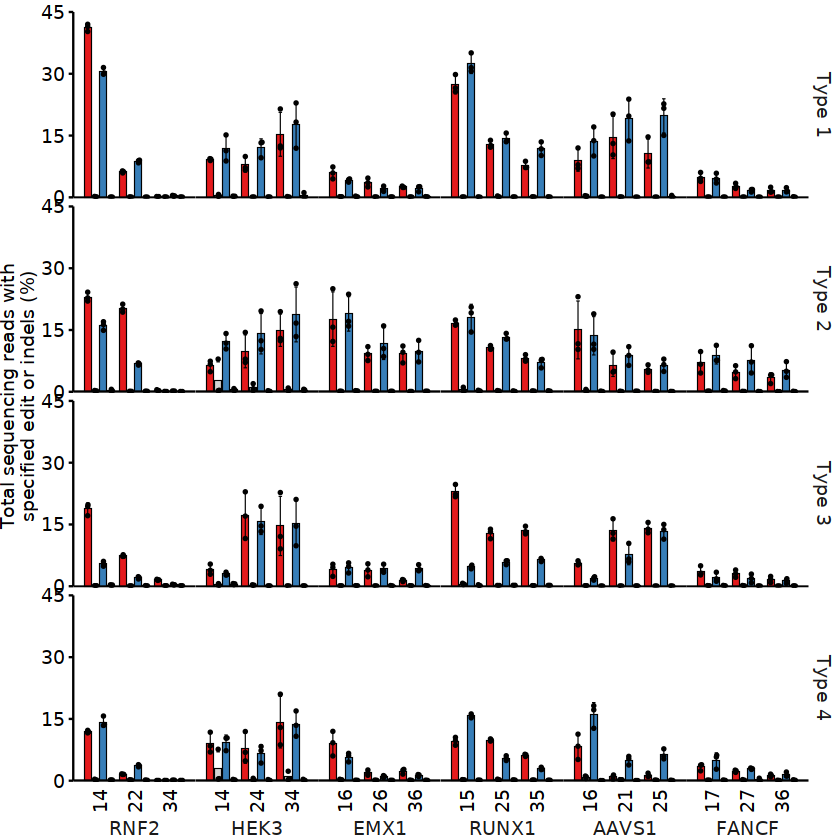

In [7]:
#pdf('plots/Editing_Type_Efficiency.pdf', width = 4.5, height = 2.8, useDingbats = FALSE)
plot_results_by_type(summary_all) + annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf#, size = 1
                                            ) +
    theme(axis.line.x = element_blank(), text = element_text(size = (11/.pt) * (11/3))
          , legend.position = "none"
          , axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
#dev.off()